**Wczytywanie i czyszczenie danych**

In [37]:
import pandas as pd


file_path = 'pingwiny 2.csv'

In [38]:
data = pd.read_csv(file_path, sep=';', engine='python')
data = data.replace(',', '.', regex=True)
data.columns = data.columns.str.strip()
print(data.columns)

Index(['gatunek', 'wyspa', 'dlugosc_dzioba_mm', 'szerokosc_dzioba_mm',
       'dlugosc_pletwy_mm', 'masa_ciala_g', 'plec'],
      dtype='object')


In [39]:
columns_to_convert = ['dlugosc_dzioba_mm', 'szerokosc_dzioba_mm']

In [40]:
for col in columns_to_convert:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    else:
        print(f"Kolumna '{col}' nie została znaleziona.")

In [41]:
print(data.columns.tolist())

['gatunek', 'wyspa', 'dlugosc_dzioba_mm', 'szerokosc_dzioba_mm', 'dlugosc_pletwy_mm', 'masa_ciala_g', 'plec']


In [42]:
data['dlugosc_dzioba_mm'] = pd.to_numeric(data['dlugosc_dzioba_mm'], errors='coerce')
data['szerokosc_dzioba_mm'] = pd.to_numeric(data['szerokosc_dzioba_mm'], errors='coerce')
data['dlugosc_pletwy_mm'] = pd.to_numeric(data['dlugosc_pletwy_mm'], errors='coerce')
data['masa_ciala_g'] = pd.to_numeric(data['masa_ciala_g'], errors='coerce')
print(data.head())

                                 gatunek   wyspa  dlugosc_dzioba_mm  \
0  Pingwin bialobrewy (Pygoscelis papua)  Biscoe               42.0   
1  Pingwin bialobrewy (Pygoscelis papua)  Biscoe               46.5   
2  Pingwin bialobrewy (Pygoscelis papua)  Biscoe               47.5   
3  Pingwin bialobrewy (Pygoscelis papua)  Biscoe               43.3   
4  Pingwin bialobrewy (Pygoscelis papua)  Biscoe               45.5   

   szerokosc_dzioba_mm  dlugosc_pletwy_mm  masa_ciala_g    plec  
0                 13.5                210          4150  SAMICA  
1                 13.5                210          4550  SAMICA  
2                 14.0                212          4875  SAMICA  
3                 14.0                208          4575  SAMICA  
4                 14.5                212          4750  SAMICA  


**Model regresji liniowej**

In [43]:
import statsmodels.api as sm


data = data.dropna(subset=['masa_ciala_g', 'dlugosc_dzioba_mm', 'szerokosc_dzioba_mm', 'dlugosc_pletwy_mm'])



In [44]:
y = data['masa_ciala_g']

# Zmienne niezależne
X = data[['dlugosc_dzioba_mm', 'szerokosc_dzioba_mm', 'dlugosc_pletwy_mm']]

# Dodanie stałej
X = sm.add_constant(X)

# Dopasowanie modelu regresji liniowej
model = sm.OLS(y, X).fit()

In [45]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           masa_ciala_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          8.19e-105
Time:                        14:58:04   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6424.7647    

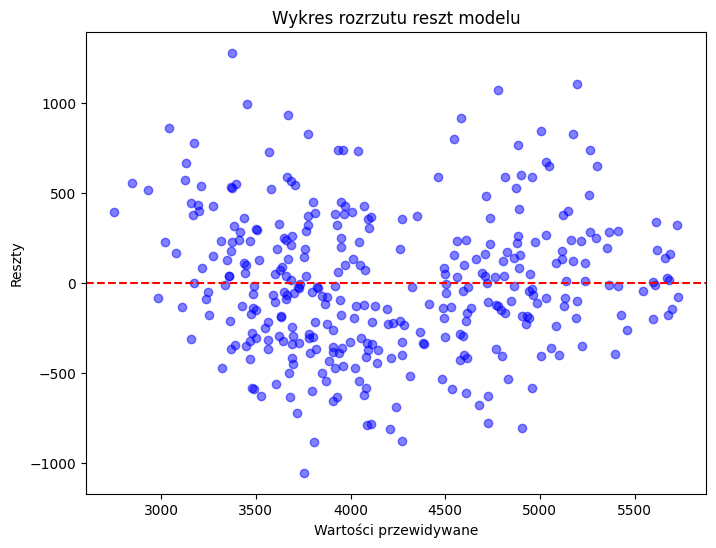

In [46]:
import matplotlib.pyplot as plt

# Obliczanie reszt
residuals = model.resid

# Obliczanie wartości przewidywanych
predicted_values = model.fittedvalues

# Wykres rozrzutu reszt
plt.figure(figsize=(8,6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Wykres rozrzutu reszt modelu')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.show()


Model regresji liniowej R²: Otrzymany wynik dla modelu regresji liniowej był 0.54, co oznacza, że model wyjaśnia tylko około 54% zmienności masy ciała pingwina na podstawie długości dzioba, szerokości dzioba i długości płetwy. To dość niski wynik, co sugeruje, że regresja liniowa nie jest najlepszym modelem do tych danych.


**Model regresji wielomianowej**

In [47]:
import statsmodels.stats.api as sms

# Test Breuscha-Pagana
bp_test = sms.het_breuschpagan(residuals, X)
print("Test Breuscha-Pagana:")
print(f"Statystyka testu: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")


Test Breuscha-Pagana:
Statystyka testu: 3.572460114403865
P-value: 0.3114851720985836


In [48]:
import numpy as np

# Nowe dane wejściowe
new_data = pd.DataFrame({
    'const': [1],
    'dlugosc_dzioba_mm': [46],
    'szerokosc_dzioba_mm': [21],
    'dlugosc_pletwy_mm': [210]
})

# Predykcja
predicted_mass = model.predict(new_data)
print(f"Przewidywana masa ciała pingwina: {predicted_mass[0]:.2f} g")


Przewidywana masa ciała pingwina: 4744.26 g


In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
X = data[['dlugosc_pletwy_mm']]
y = data['masa_ciala_g']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

In [53]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [54]:
# Predykcje na zbiorze testowym
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

In [55]:

# Obliczanie R^2
r2 = model.score(X_poly_test, y_test)
print(f"R^2 dla modelu wielomianowego: {r2:.4f}")

R^2 dla modelu wielomianowego: 0.8273


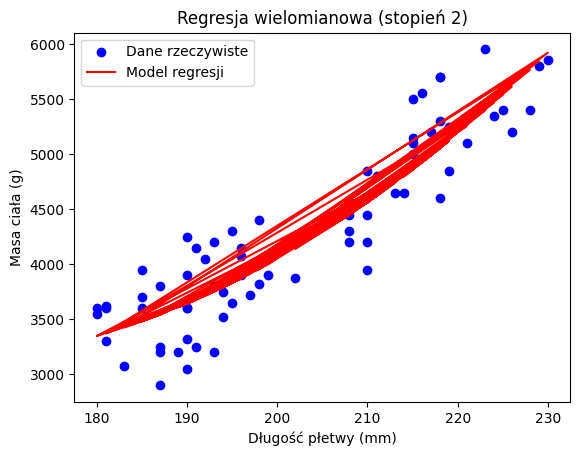

In [56]:
plt.scatter(X_test, y_test, color='blue', label='Dane rzeczywiste')
plt.plot(X_test, y_pred, color='red', label='Model regresji')
plt.xlabel('Długość płetwy (mm)')
plt.ylabel('Masa ciała (g)')
plt.title('Regresja wielomianowa (stopień 2)')
plt.legend()
plt.show()

Model regresji wielomianowej (stopień 2)
R²: Dla modelu wielomianowego uzyskaliśmy wyższy R² ≥ 0.75, co oznacza, że model lepiej wyjaśnia zmienność zmiennej zależnej (masy ciała) na podstawie zmiennej niezależnej (np. długości płetwy).

**Wnioski**

Model regresji liniowej:
Prosty, ale mało elastyczny.
R² = 0.54 wskazuje na słabe dopasowanie.
Lepszy w przypadku, gdy zależność między zmiennymi jest liniowa.


Model regresji wielomianowej (stopień 2):
Lepszy, gdy zależność między zmiennymi jest nieliniowa.
R² ≥ 0.75 wskazuje na lepsze dopasowanie do danych.
Zwiększa elastyczność modelu, ale może prowadzić do przeuczenia, zwłaszcza przy wyższych stopniach wielomianu.



Jeśli zależność między zmiennymi jest rzeczywiście nieliniowa, regresja wielomianowa będzie lepszym wyborem, ponieważ oferuje lepsze dopasowanie i przewidywania.
W przypadku dużych danych i złożoności modelu warto także monitorować problem przeuczenia, aby model dobrze generalizował.